In [91]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

In [93]:
pd.set_option('display.max_columns', 500)

In [94]:
player_data = pd.read_csv('OverallPredictor.csv')

In [95]:
unq_positions = player_data['Best Position'].unique()
unq_positions.sort()
print (unq_positions)

['CAM' 'CB' 'CDM' 'CF' 'CM' 'GK' 'LB' 'LM' 'LW' 'LWB' 'RB' 'RM' 'RW' 'RWB'
 'ST']


In [96]:
count = 0
map_dict = {}
for pos in unq_positions:
    map_dict[pos] = count
    count += 1

In [97]:
data_arr = []
for pos in unq_positions:
    data_arr.append(np.array([], dtype='float32'))

In [98]:
for i in range(player_data.shape[0]):
    pos = player_data.iloc[i,:]['Best Position']
    data_arr[map_dict[pos]] = np.append(data_arr[map_dict[pos]], player_data.iloc[i,:], axis=0)

In [101]:
for i in range(len(data_arr)):
    data_arr[i] = np.array(data_arr[i]).reshape(len(data_arr[i])//37,37)

ValueError: cannot reshape array of size 48618 into shape (35,37)

In [102]:
for i in range(len(data_arr)):
    data_arr[i] = pd.DataFrame(data_arr[i], columns=player_data.columns)

In [103]:
y_arr = []

In [104]:
for i in range(len(data_arr)):
    y_arr.append(np.array(data_arr[i]['Overall']))
    data_arr[i] = data_arr[i].drop(columns=['Overall', 'Best Position', 'Positions'])

In [105]:
for i in range(len(data_arr)):
    data_arr[i] = np.array(pd.DataFrame(data_arr[i].values, dtype='float32'))

In [106]:
data_arr[0]

array([[79., 60., 80., ..., 54., 77., 71.],
       [79., 70., 78., ..., 67., 88., 86.],
       [67., 46., 89., ..., 41., 67., 59.],
       ...,
       [62., 51., 61., ..., 34., 59., 56.],
       [65., 59., 66., ..., 65., 66., 68.],
       [60., 45., 60., ..., 68., 62., 51.]], dtype=float32)

In [107]:
data_arr = np.array(data_arr)
y_arr = np.array(y_arr)

In [108]:
models = []
for i in range(len(data_arr)):
    models.append(Lasso(alpha=1e-10, fit_intercept=False,max_iter=10e6,positive=True))

In [109]:
for i in range(len(models)):
    models[i].fit(X=data_arr[i], y=y_arr[i])

In [110]:
for i in range(len(models)):
    print (unq_positions[i], end=': ')
    print (models[i].score(X=data_arr[i], y=y_arr[i]))

CAM: 0.9910495044616903
CB: 0.9905967151566691
CDM: 0.9882131061493309
CF: 0.9957783506463022
CM: 0.9946036238266012
GK: 0.9986437434860534
LB: 0.9971140781593028
LM: 0.9861673679379225
LW: 0.9942362245915716
LWB: 0.9958261652523136
RB: 0.9962240701695041
RM: 0.984673971746708
RW: 0.9909846268540896
RWB: 0.9947685004445312
ST: 0.9936332935564892


In [111]:
predictions_arr = []
for i in range(len(models)):
    predictions_arr.append(models[i].predict(X=data_arr[i]))

No handles with labels found to put in legend.


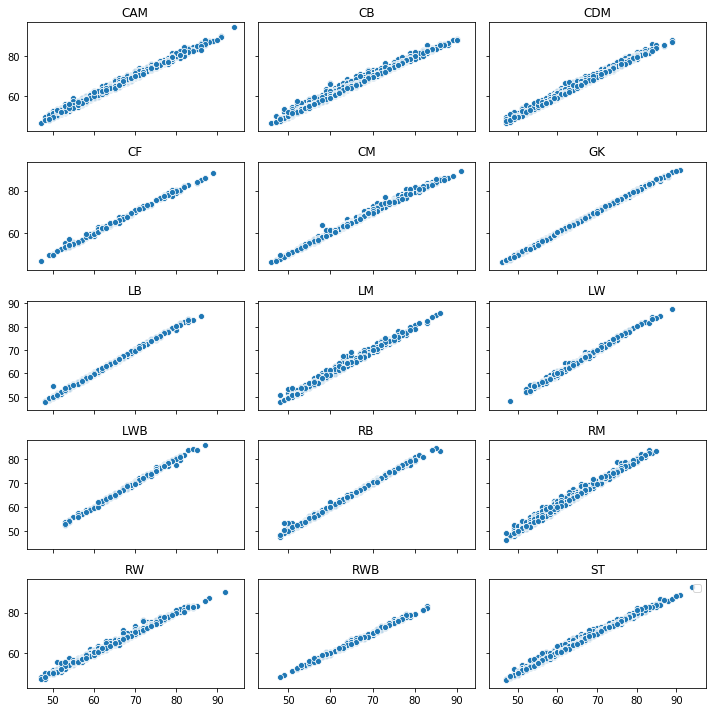

In [112]:
fig, axes = plt.subplots(5, 3, sharex='col', sharey='row', figsize=(10,10))
count = -1
for r in range(5):
    for c in range(3):
        count += 1
        ax = axes[r, c]
        sns.scatterplot(x=y_arr[count], y=predictions_arr[count], ax=ax)
        ax.set_title(unq_positions[count])
plt.legend()
plt.tight_layout()
plt.show()

In [113]:
cols = player_data.drop(columns=['Best Position', 'Overall', 'Positions']).columns
for ind, pos in enumerate(unq_positions):
    print (pos, end=': \n')
    sum_weights = sum(models[ind].coef_)
    for index, weight in enumerate(models[ind].coef_):
        if (weight > 0):
            print ('{}: {:.5f}%'.format(cols[index],100*(weight/sum_weights)))

CAM: 
Acceleration: 2.97292%
Aggression: 0.14726%
Agility: 1.48448%
Balance: 0.86626%
Ball Control: 14.73389%
Crossing: 1.81421%
Dribbling: 13.30512%
FK Accuracy: 0.38457%
Finishing: 6.38787%
GK Handling: 1.05228%
GK Kicking: 0.59038%
GK Positioning: 0.04888%
GK Reflexes: 0.03888%
Heading Accuracy: 0.61427%
Jumping: 0.00980%
Long Passing: 3.59432%
Long Shots: 3.95858%
Penalties: 0.10723%
Positioning: 8.19935%
Reactions: 6.61150%
Short Passing: 13.32040%
Sprint Speed: 3.02476%
Stamina: 0.97966%
Vision: 15.75312%
CB: 
Aggression: 5.03099%
Ball Control: 1.97782%
Composure: 0.53034%
GK Diving: 0.21298%
Heading Accuracy: 11.19195%
Interceptions: 14.13016%
Jumping: 3.49638%
Marking: 14.55960%
Reactions: 4.30106%
Short Passing: 4.77079%
Sliding Tackle: 10.38923%
Sprint Speed: 1.79044%
Standing Tackle: 17.98517%
Strength: 9.63310%
CDM: 
Aggression: 3.92103%
Ball Control: 10.66081%
Composure: 0.52400%
FK Accuracy: 0.13007%
GK Kicking: 0.88139%
GK Positioning: 0.48986%
Heading Accuracy: 0.26276%

In [74]:
np.sum(models[0].coef_)

1.0774261

In [121]:
row = np.ones(shape=(1,34))*99

In [123]:
for index, model in enumerate(models):
    print ('As a {}: {}'.format(unq_positions[index], model.predict(row)[0]))

As a CAM: 101.54850735323271
As a CB: 99.914734326303
As a CDM: 101.1647854159819
As a CF: 103.67354273912497
As a CM: 101.20413929647111
As a GK: 101.3515060312202
As a LB: 102.29483800887829
As a LM: 103.80385679175379
As a LW: 101.75325384910684
As a LWB: 103.06519274612947
As a RB: 102.05915509129409
As a RM: 103.66811680630781
As a RW: 100.71814452782564
As a RWB: 101.83654498806936
As a ST: 101.22583754430525
